# Combining segment efforts with weather conditions (for athelete)

In [1]:
import Strava_Download as strava

In [2]:
weather = strava.get_effort_weather(38084713616)
weather

No such attribute athlete_segment_stats on entity <SegmentEffort id=38084713616 name='Lingfield TT loop' resource_state=3>


Pressure                    1009
Humidity                      64
Temp                          22
WindDirn                     254
Wind                          12
AirDensity               1.08417
SegmentName    Lingfield TT loop
Longitude                0.00831
Latitude                 51.1663
Elevation                 111.35
Name: 2018-04-22 11:50:34, dtype: object

In [3]:
weather.name

datetime.datetime(2018, 4, 22, 11, 50, 34)

In [4]:
import stravalib
mytoken = strava.get_token()
client = stravalib.Client(access_token = mytoken) 

In [5]:
import pandas as pd
import numpy as np

# Examine efforts on particular segment, using weather
- Conclusion is that this doesn't really work, because many laps are disrupted by traffic.

In [6]:
segment = 610040 # Tour of Richmond Park
limit = 100

In [7]:
xx = client.get_segment_efforts(segment, limit=limit)

df = pd.DataFrame()

for x in xx:
    weather = strava.get_effort_weather(x.id)
    d = x.to_dict()
    effortStats = {k : d[k] for k in [ 'start_date_local','average_cadence', 'average_heartrate', 'average_watts',
                                     'device_watts','distance','elapsed_time',
                                     'max_heartrate','moving_time',]}
    effortStats = weather.append(pd.Series(effortStats,name=weather.name))
    df = pd.concat([df, effortStats.to_frame().T])

No such attribute athlete_segment_stats on entity <SegmentEffort id=1522793879 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=37927301348 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=27345987661 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=28413412976 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=1122317590 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=6716004155 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=14081111407 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=28413421828 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=201195990 name=None resource_state=None>
No suc

No such attribute athlete_segment_stats on entity <SegmentEffort id=14134088467 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=201189921 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=6823965891 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=201190426 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=256735533 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=1583514394 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=13966218931 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=110678740 name=None resource_state=None>
No such attribute athlete_segment_stats on entity <SegmentEffort id=201195704 name=None resource_state=None>
No such attri

Tidy up the dataframe

In [9]:
df = df.infer_objects()

df['start_date_local'] = pd.to_datetime(df['start_date_local'])
for c in ['elapsed_time',  'moving_time', ]:
    df[c] = pd.to_timedelta(df[c])
df['Seconds'] = df.elapsed_time / np.timedelta64(1, 's')

In [10]:
df.head()

,Pressure,Humidity,Temp,WindDirn,Wind,AirDensity,SegmentName,Longitude,Latitude,Elevation,average_cadence,average_heartrate,average_watts,device_watts,distance,elapsed_time,max_heartrate,moving_time,start_date_local,Seconds
2013-08-20 19:44:51,1026.0,57.0,22.0,244.0,6.0,1.133744,Tour de Richmond Park,-0.257223,51.453639,25.35,90.0,210.3,353.6,False,10804.9,00:15:52,254.0,00:15:52,2013-08-20 19:36:55,952.0
2018-04-20 10:25:52,1023.0,65.0,22.0,308.0,4.0,1.095778,Tour de Richmond Park,-0.257223,51.453639,25.35,83.7,148.5,253.5,True,10755.5,00:15:59,162.0,00:15:59,2018-04-20 10:17:53,959.0
2017-07-31 09:30:02,1011.0,66.0,21.0,238.0,10.0,1.080168,Tour de Richmond Park,-0.257223,51.453639,25.35,85.5,148.3,316.5,True,10580.7,00:16:02,160.0,00:16:02,2017-07-31 09:22:01,962.0
2017-08-26 08:29:13,1016.0,80.0,21.0,287.0,2.0,0.990563,Tour de Richmond Park,-0.257223,51.453639,25.35,81.5,146.3,281.2,True,10742.6,00:16:02,164.0,00:16:02,2017-08-26 08:21:12,962.0
2013-05-02 19:22:45,1022.0,42.0,16.0,101.0,6.0,1.193983,Tour de Richmond Park,-0.257223,51.453639,25.35,84.1,154.9,334.9,False,10813.3,00:16:13,178.0,00:16:13,2013-05-02 19:14:39,973.0


In [11]:
df.describe()

,Pressure,Humidity,Temp,WindDirn,Wind,AirDensity,Longitude,Latitude,Elevation,average_cadence,average_heartrate,average_watts,distance,elapsed_time,max_heartrate,moving_time,Seconds
count,100.000000,100.000000,99.000000,100.00000,100.000000,99.000000,1.000000e+02,100.000000,1.000000e+02,92.000000,99.000000,97.000000,100.000000,100,99.000000,100,100.000000
mean,1008.200000,64.150000,18.303030,202.70000,8.650000,1.089892,-2.572230e-01,51.453639,2.535000e+01,82.515217,138.829293,275.763918,10798.466000,0 days 00:16:59.650000,158.393939,0 days 00:16:58.950000,1019.650000
std,86.325318,13.132868,4.525336,93.34053,3.453515,0.067043,1.673724e-16,0.000000,4.641795e-14,10.007491,26.414862,45.141978,48.702826,0 days 00:00:21.057580,31.079168,0 days 00:00:21.268070,21.057581
min,157.000000,10.000000,4.000000,20.00000,2.000000,0.865584,-2.572230e-01,51.453639,2.535000e+01,0.000000,46.800000,0.000000,10517.900000,0 days 00:15:52,53.000000,0 days 00:15:52,952.000000
25%,1011.000000,57.000000,16.000000,100.00000,6.000000,1.053460,-2.572230e-01,51.453639,2.535000e+01,80.900000,139.850000,261.800000,10786.550000,0 days 00:16:51,157.000000,0 days 00:16:50.750000,1011.000000
50%,1017.000000,65.000000,18.000000,223.50000,9.000000,1.102539,-2.572230e-01,51.453639,2.535000e+01,83.800000,144.800000,282.400000,10804.350000,0 days 00:17:03,161.000000,0 days 00:17:03,1023.000000
75%,1022.000000,74.000000,21.000000,278.00000,11.000000,1.134864,-2.572230e-01,51.453639,2.535000e+01,86.625000,148.400000,295.300000,10823.200000,0 days 00:17:13.500000,164.000000,0 days 00:17:12.250000,1033.500000
max,1034.000000,92.000000,29.000000,360.00000,19.000000,1.210868,-2.572230e-01,51.453639,2.535000e+01,94.600000,210.300000,353.600000,10907.000000,0 days 00:17:29,254.000000,0 days 00:17:29,1049.000000


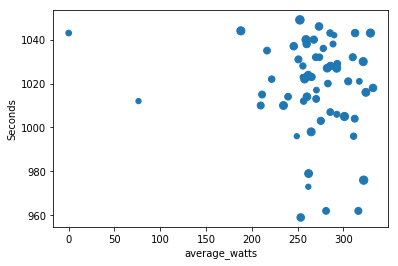

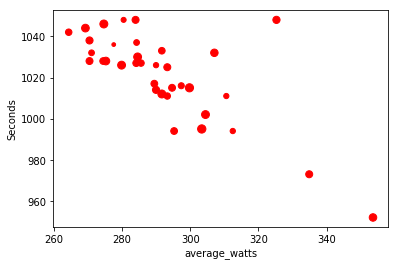

In [12]:
df[df.device_watts==True].plot.scatter('average_watts','Seconds',s=df.AirDensity.subtract(0.85).multiply(200))
df[df.device_watts==False].plot.scatter('average_watts','Seconds',s=df.AirDensity.subtract(0.85).multiply(200),c='r')


It is evident from the blue chart that a lap can be really slow in spite of high average watts. This has to be due to traffic delays. Sometimes this is obvious, due to actually stopping, like 2012-08-14 20:09:49, where moving_time is more than a minute less than elapsed_time and estimated power is 325W. 

In [13]:
df.tail()

,Pressure,Humidity,Temp,WindDirn,Wind,AirDensity,SegmentName,Longitude,Latitude,Elevation,average_cadence,average_heartrate,average_watts,device_watts,distance,elapsed_time,max_heartrate,moving_time,start_date_local,Seconds
2016-01-16 09:30:04,1029.0,83.0,4.0,329.0,5.0,1.038633,Tour de Richmond Park,-0.257223,51.453639,25.35,76.1,143.0,273.5,True,10786.1,00:17:26,161.0,00:17:26,2016-01-16 09:21:21,1046.0
2012-08-14 20:09:49,1011.0,64.0,23.0,186.0,7.0,1.082859,Tour de Richmond Park,-0.257223,51.453639,25.35,87.2,152.7,325.3,False,10798.3,00:17:28,165.0,00:16:18,2012-08-14 20:01:05,1048.0
2013-07-11 20:07:00,1025.0,57.0,21.0,43.0,10.0,1.136414,Tour de Richmond Park,-0.257223,51.453639,25.35,58.9,143.3,280.5,False,10792.8,00:17:28,161.0,00:17:28,2013-07-11 19:58:16,1048.0
2013-08-20 20:01:31,1026.0,58.0,22.0,243.0,6.0,1.130014,Tour de Richmond Park,-0.257223,51.453639,25.35,85.0,154.1,284.0,False,10769.3,00:17:28,221.0,00:17:28,2013-08-20 19:52:47,1048.0
2015-06-10 19:31:29,1025.0,52.0,17.0,70.0,14.0,1.168892,Tour de Richmond Park,-0.257223,51.453639,25.35,77.9,139.2,252.6,True,10798.2,00:17:29,163.0,00:17:29,2015-06-10 19:22:45,1049.0


In [6]:
xx = client.get_activity(971178783, )

No such attribute leaderboard_opt_out on entity <Activity id=None name=None resource_state=None>


In [8]:
xx.start_date_local

datetime.datetime(2017, 5, 4, 19, 19, 24)